In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from autils import plt_act_trio
from lab_utils_relu import *
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)


<a name="2"></a>
## 2 - ReLU Activation
本周，一个新的激活函数被介绍，叫做修正线性单元（ReLU）。
$$ a = max(0,z) $$

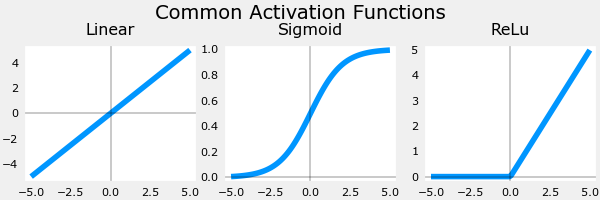

In [13]:
plt_act_trio()

<img align="right" src="../work/images/C2_W2_ReLu.png"     style=" width:380px; padding: 10px 20px; " >
讲座中的示例展示了ReLU的应用。在这个示例中，派生的“意识”特征不是二进制的，而是具有连续的值范围。sigmoid函数最适合开/关或二进制情况。ReLU提供了连续的线性关系。此外，它还有一个“关闭”范围，输出为零。 "关闭"特性使ReLU成为非线性激活函数。为什么需要这个特性呢？让我们在下面进行探讨。

### Why Non-Linear Activations?  
<img align="left" src="../work/images/C2_W2_ReLU_Graph.png"     style=" width:250px; padding: 10px 20px; " > 所示的函数由线性部分组成（分段线性）。在线性部分，斜率保持一致，然后在转折点处突然改变。在转折点处，添加一个新的线性函数，当添加到现有函数时，它将产生新的斜率。新函数在转折点处添加，但在该点之前不会对输出产生贡献。非线性激活函数负责在转折点之前和有时之后禁用输入。以下练习提供了一个更具体的例子。

这个练习将在下面的网络中使用，在一个回归问题中你必须建立一个分段线性的目标模型：
<img align="center" src="../work/images/C2_W2_ReLU_Network.png"     style=" width:650px; padding: 10px 20px; ">  
这个网络有3个单元在第一层。每个单元将负责目标的一部分。单元0是预编程的，并固定映射到第一个线性段。您将修改单元1和2中的权重和偏置来建立第2和第3段。输出单元也是固定的，只需对第一层的输出求和。

使用下面的滑块修改权重和偏置以匹配目标。

提示：从“w1”和“b1”开始，将“w2”和“b2”保持为零，直到匹配第二个线性段。点击而不是滑动更快。如果遇到麻烦，请不用担心，下面的文字将更详细地描述这一点。

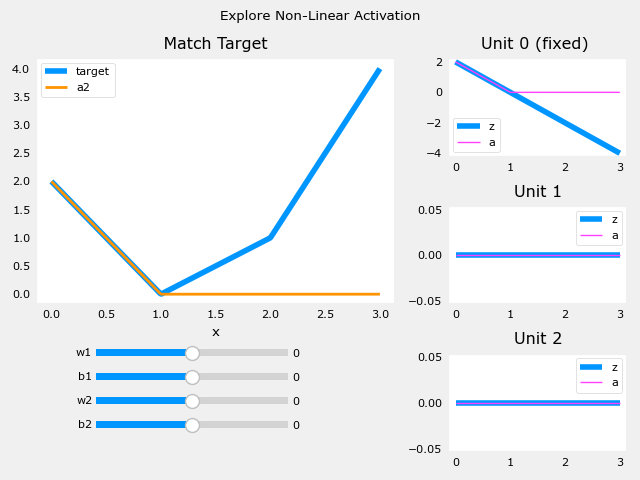

In [14]:
_ = plt_relu_ex()

 
这个练习的目标是了解ReLU的非线性行为如何提供所需的能力，以使函数在需要之前关闭。让我们看看这个例子中它是如何工作的。
<img align="right" src="../work/images/C2_W2_ReLU_Plot.png"     style=" width:600px; padding: 10px 20px; "> 
右侧的图表包含第一层单元的输出。从顶部开始，单元0负责第一个标有1的线性段。显示了线性函数$z$和ReLU后面的函数$a$。您可以看到ReLU在区间[0,1]之后截断了函数。这是关键，因为它防止干扰后面的线性段。

单元1负责第二个线性段。在这里，ReLU将此单元保持静默，直到x大于1。由于第一个单元没有贡献，因此单元1的斜率$w^{[1]}_1$就是目标线的斜率。必须调整偏置以保持输出在x达到1之前为负。

单元2负责第三个线性段。ReLU再次将输出清零，直到x达到正确的值。单元的斜率$w^{[1]}_2$必须设置为使单元1和2的总和具有所需的斜率。偏置再次调整以保持输出在x达到2之前为负。


ReLU激活的“关闭”或禁用功能使模型能够将线性段拼接在一起，以建模复杂的非线性函数。


# =======End of new Material===

## New Activation
This week a new activation was introduced, the Rectified Linear Unit (ReLU). 

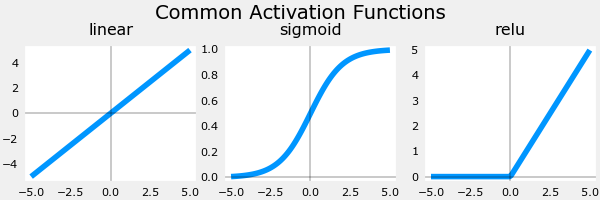

In [35]:
def plt_act_trio():
    X = np.linspace(-5,5,100)
    fig,ax = plt.subplots(1,3, figsize=(6,2))
    widgvis(fig)
    ax[0].plot(X,tf.keras.activations.linear(X))
    ax[0].axvline(0, lw=0.3, c="black")
    ax[0].axhline(0, lw=0.3, c="black")
    ax[0].set_title("linear")
    ax[1].plot(X,tf.keras.activations.sigmoid(X))
    ax[1].axvline(0, lw=0.3, c="black")
    ax[1].axhline(0, lw=0.3, c="black")
    ax[1].set_title("sigmoid")
    ax[2].plot(X,tf.keras.activations.relu(X))
    ax[2].axhline(0, lw=0.3, c="black")
    ax[2].axvline(0, lw=0.3, c="black")
    ax[2].set_title("relu")
    fig.suptitle("Common Activation Functions", fontsize=14)
    fig.tight_layout(pad=0.2)
    plt.show()
plt_act_trio()

<right images>
    
右侧的示例展示了ReLU的一个应用。在该示例中，“感知”特征不是二进制的，而是具有从0到较大值变化的范围。Sigmoid最适合开/关或二进制情况。ReLU提供线性关系和输出为零的“关闭”范围。这个“关闭”特征使ReLU成为一个非线性激活函数。为什么需要这个特性呢？让我们通过下面的示例来说明。

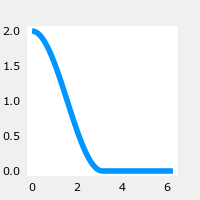

In [36]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
y[50:100]=0
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
plt.show()

In [32]:
w10 = np.array([[-1]])
b10 = np.array([2.6])
d10 = Dense(1, activation = "linear", input_shape = (1,), weights=[w10,b10])
z10 = d10(X.reshape(-1,1))
a10 = relu(z10)

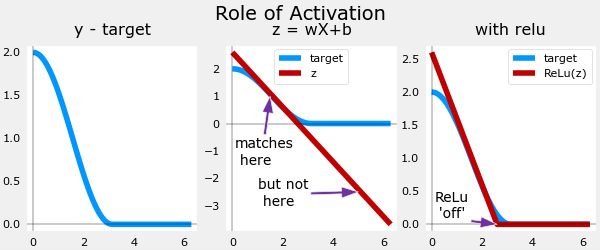

In [34]:
def plt_act1(y,z,a):
    fig,ax = plt.subplots(1,3, figsize=(6,2.5))
    widgvis(fig)
    ax[0].plot(X,y,label="target")
    ax[0].axvline(0, lw=0.3, c="black")
    ax[0].axhline(0, lw=0.3, c="black")
    ax[0].set_title("y - target")
    ax[1].plot(X,y, label="target")
    ax[1].plot(X,z, c=dlc["dldarkred"],label="z")
    ax[1].axvline(0, lw=0.3, c="black")
    ax[1].axhline(0, lw=0.3, c="black")
    ax[1].set_title("z = wX+b")
    ax[1].legend(loc="upper center")
    ax[2].plot(X,y, label="target")
    ax[2].plot(X,a, c=dlc["dldarkred"],label="ReLu(z)")
    ax[2].axhline(0, lw=0.3, c="black")
    ax[2].axvline(0, lw=0.3, c="black")
    ax[2].set_title("with relu")
    ax[2].legend()
    fig.suptitle("Role of Activation", fontsize=14)
    fig.tight_layout(pad=0.2)
    return(ax)


def plt_add_notation(ax):
    ax[1].annotate(text = "matches\n here", xy =(1.5,1.0), 
                   xytext = (0.1,-1.5), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    ax[1].annotate(text = "but not\n here", xy =(5,-2.5), 
                   xytext = (1,-3), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    ax[2].annotate(text = "ReLu\n 'off'", xy =(2.6,0), 
                   xytext = (0.1,0.1), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    
ax = plt_act1(y,z10,a10)
plt_add_notation(ax)

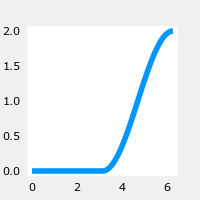

In [37]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
y[0:49]=0
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
plt.show()

array([<AxesSubplot:title={'center':'y - target'}>,
       <AxesSubplot:title={'center':'z = wX+b'}>,
       <AxesSubplot:title={'center':'with relu'}>], dtype=object)

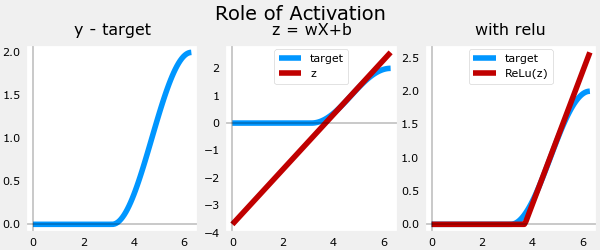

In [38]:
w11 = np.array([[1]])
b11 = np.array([-3.7])
d11 = Dense(1, activation = "linear", input_shape = (1,), weights=[w11,b11])
z11 = d11(X.reshape(-1,1))
a11 = relu(z11)
plt_act1(y,z11,a11)

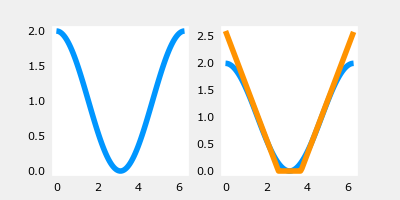

In [39]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
X=X.reshape(-1,1)
yhat = relu(d10(X)) + relu(d11(X))

fig,ax = plt.subplots(1,2, figsize=(4,2))
widgvis(fig)
ax[0].plot(X,y)
ax[1].plot(X,y)
ax[1].plot(X,yhat)
plt.show()

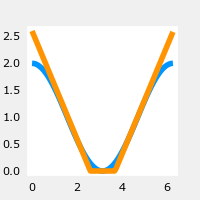

In [40]:
X=X.reshape(-1,1)
yhat = relu(d10(X)) + relu(d11(X))
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
ax.plot(X,yhat)
plt.show()

NameError: name 'model' is not defined

In [41]:
model = Sequential(
    [ 
        d10,
        tf.layers.Activation(activations.relu),
        d11,
        tf.layers.Activation(activations.relu),
        Dense(1, activation = 'linear')
    ]
)
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.1),
)

model.fit(
    X,y,
    epochs=1000
)

AttributeError: module 'tensorflow' has no attribute 'layers'

4/4 [==============================] - 0s 1ms/step


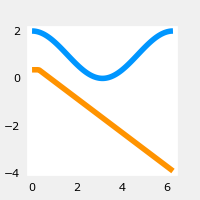

In [42]:
yhat = model.predict(X.reshape(-1,1))
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
ax.plot(X,yhat)
plt.show()

In [43]:
model = Sequential(
    [ 
        Dense(1,activation="relu", name = 'l1'),
        Dense(1,activation="linear", name = 'l2')
    ]
)
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X,y,
    epochs=10
)

Epoch 1/10
4/4 [==============================] - 0s 1ms/step - loss: 3.3921
Epoch 2/10
4/4 [==============================] - 0s 999us/step - loss: 2.8384
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 2.3950
Epoch 4/10
4/4 [==============================] - 0s 1ms/step - loss: 2.0512
Epoch 5/10
4/4 [==============================] - 0s 1ms/step - loss: 1.7747
Epoch 6/10
4/4 [==============================] - 0s 1ms/step - loss: 1.5578
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 1.3933
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 1.2579
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 1.1555
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 1.0695


In [44]:
yhat = model.predict(X)
yhat[0:5]

4/4 [==============================] - 0s 1ms/step


array([[0.36],
       [0.36],
       [0.36],
       [0.36],
       [0.36]], dtype=float32)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


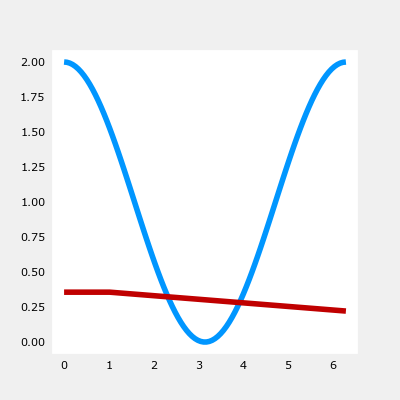

In [45]:
fig,ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(X,y)
ax.plot(X,yhat, c=dlc["dldarkred"])
plt.show()

In [28]:
l1 = model.get_layer('l1')
l2 = model.get_layer('l2')

In [29]:
l1.get_weights()

[array([[1.12]], dtype=float32), array([-0.34], dtype=float32)]

In [30]:
l2.get_weights()

[array([[-0.64]], dtype=float32), array([0.36], dtype=float32)]

In [46]:
l1 = model.get_layer('l1')
l2 = model.get_layer('l2')
l1.get_weights()
l2.get_weights()

w1 = np.array([[-1]])
b1 = np.array([1])
l1.set_weights([w1,b1])

w2 = np.array([[1]])
b2 = np.array([0])
l2.set_weights([w2,b2])
model.fit(
    X,y,
    epochs=100
)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 1.2451
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 1.1915
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1346
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0739
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0150
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9578
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9012
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8474
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7971
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7530
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7109
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6738
Epoch 13/100
4/4 [==============================] - 0s 1ms/st

In [47]:
l2.set_weights([w2,b2])

4/4 [==============================] - 0s 1ms/step


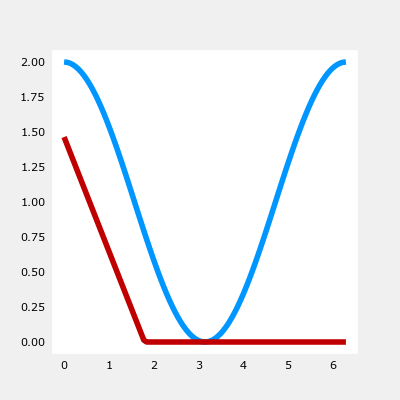

In [48]:
yhat = model.predict(X)
fig,ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(X,y)
ax.plot(X,yhat, c=dlc["dldarkred"])
plt.show()

## 2-D

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings
from matplotlib import cm
from matplotlib.patches import FancyArrowPatch
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as colors
from lab_utils_common import dlc
dkcolors = plt.cm.Paired((1,3,7,9,5,11))
ltcolors = plt.cm.Paired((0,2,6,8,4,10))
dkcolors_map = mpl.colors.ListedColormap(dkcolors)
ltcolors_map = mpl.colors.ListedColormap(ltcolors)



In [50]:
def plt_mc_data(ax, X, y, classes,  class_labels=None, map=plt.cm.Paired, 
                legend=False, size=50, m='o', equal_xy = False):
    """ Plot multiclass data. Note, if equal_xy is True, setting ylim on the plot may not work """
    for i in range(classes):
        idx = np.where(y == i)
        col = len(idx[0])*[i]
        label = class_labels[i] if class_labels else "c{}".format(i)
        ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
                    c=col, vmin=0, vmax=map.N, cmap=map,
                    s=size, label=label)
    if legend: ax.legend()
    if equal_xy: ax.axis("equal")

def plt_mc(X_train,y_train,classes):
    css = np.unique(y_train)
    fig,ax = plt.subplots(1,1,figsize=(3,3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    plt_mc_data(ax, X_train,y_train,classes, map=dkcolors_map, legend=True, size=10, equal_xy = False)
    ax.set_title("Multiclass Data")
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    return(ax)
    
def plot_cat_decision_boundary_mc(ax, X, predict , class_labels=None, legend=False, vector=True):

    # create a mesh to points to plot
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    h = max(x_max-x_min, y_max-y_min)/200
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    points = np.c_[xx.ravel(), yy.ravel()]
    #print("points", points.shape)
    #print("xx.shape", xx.shape)

    #make predictions for each point in mesh
    if vector:
        Z = predict(points)
    else:
        Z = np.zeros((len(points),))
        for i in range(len(points)):
            Z[i] = predict(points[i].reshape(1,2))
    Z = Z.reshape(xx.shape)

    #contour plot highlights boundaries between values - classes in this case
    ax.contour(xx, yy, Z, linewidths=1) 
    #ax.axis('tight')


<AxesSubplot:title={'center':'Multiclass Data'}, xlabel='x0', ylabel='x1'>

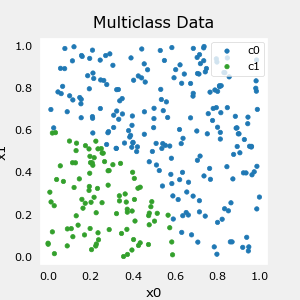

In [51]:
X = np.random.rand(300, 2)
y = np.sqrt( X[:,0]**2 + X[:,1]**2 ) < 0.6
#y = np.logical_and( X[:,0] < 0.5, X[:,1] < 0.5 ).astype(int)
y.shape
plt_mc(X,y,2,)

In [52]:
model = Sequential(
    [ 
        Dense(2,activation="relu",    name = 'l1'),
        Dense(1,activation="sigmoid", name = 'l2')
    ]
)

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X,y,
    epochs=150
)

Epoch 1/150
10/10 [==============================] - 0s 885us/step - loss: 0.2792
Epoch 2/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2514
Epoch 3/150
10/10 [==============================] - 0s 889us/step - loss: 0.2364
Epoch 4/150
10/10 [==============================] - 0s 889us/step - loss: 0.2304
Epoch 5/150
10/10 [==============================] - 0s 889us/step - loss: 0.2262
Epoch 6/150
10/10 [==============================] - 0s 889us/step - loss: 0.2238
Epoch 7/150
10/10 [==============================] - 0s 889us/step - loss: 0.2217
Epoch 8/150
10/10 [==============================] - 0s 889us/step - loss: 0.2208
Epoch 9/150
10/10 [==============================] - 0s 1000us/step - loss: 0.2197
Epoch 10/150
10/10 [==============================] - 0s 1000us/step - loss: 0.2191
Epoch 11/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2188
Epoch 12/150
10/10 [==============================] - 0s 1000us/step - loss: 0.2185
Epoch 13/150
1

1250/1250 [==============================] - 1s 560us/step


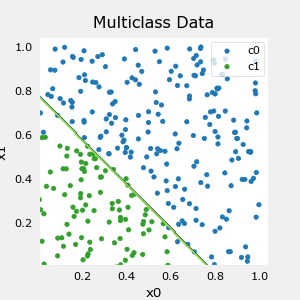

In [53]:
ax = plt_mc(X,y,2,)
predict = lambda  x: (model.predict(x) > 0.5).astype(int)
plot_cat_decision_boundary_mc(ax, X, predict, legend = True, vector=True)

In [54]:
l1 = model.get_layer("l1")
W1,b1 = l1.get_weights()
l2 = model.get_layer("l2")
W2,b2 = l2.get_weights()
print(W1,b1)
print(W2,b2)

[[ 2.93  0.27]
 [ 2.89 -0.13]] [-1.88 -0.33]
[[-6.41]
 [ 0.17]] [2.44]


In [55]:
x0 = np.array([0.4,0.60])
np.dot( np.dot(x0,W1) + b1, W2) + b2

array([-4.18])

In [ ]:
## Example

(500, 2) MiniBatchKMeans(n_clusters=3)
(500, 2) AffinityPropagation(damping=0.9, preference=-200, random_state=0)
(500, 2) MeanShift(bandwidth=1.321267758400405, bin_seeding=True)
(500, 2) SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=3)
(500, 2) AgglomerativeClustering(connectivity=<500x500 sparse matrix of type '<class 'numpy.float64'>'
	with 1892 stored elements in Compressed Sparse Row format>,
                        n_clusters=3)
(500, 2) AgglomerativeClustering(affinity='cityblock',
                        connectivity=<500x500 sparse matrix of type '<class 'numpy.float64'>'
	with 1892 stored elements in Compressed Sparse Row format>,
                        linkage='average', n_clusters=3)
(500, 2) DBSCAN(eps=0.3)
(500, 2) OPTICS(min_cluster_size=0.1, min_samples=7)
(500, 2) Birch()
(500, 2) GaussianMixture(n_components=3)


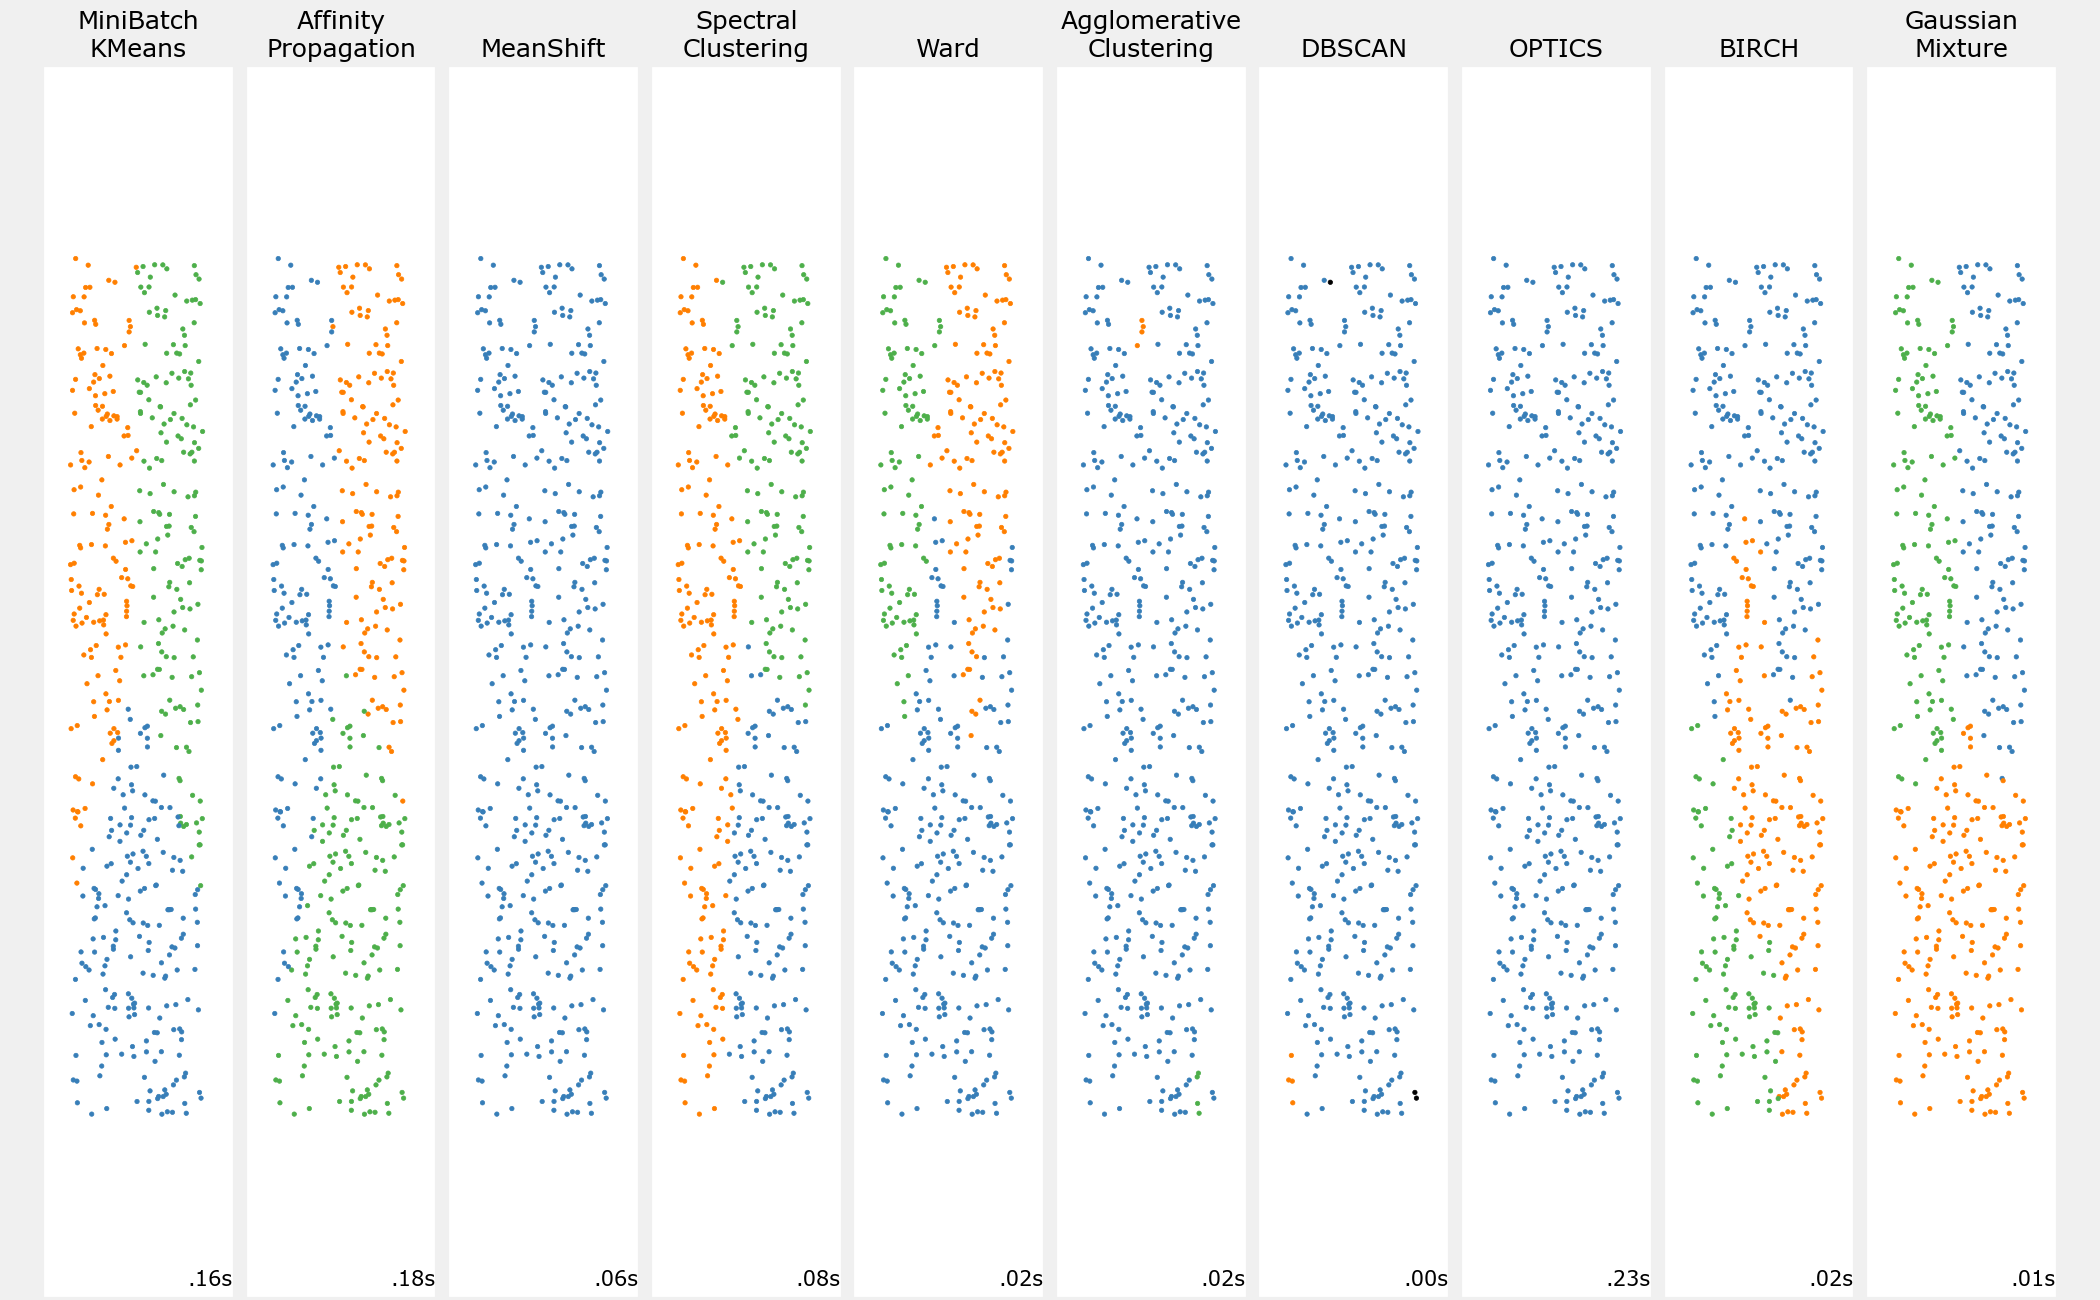

In [56]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

datasets = [
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            print(X.shape,algorithm)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()